<a href="https://colab.research.google.com/github/Dennis-Farias/data_science/blob/main/Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization: Gráficos

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Comparando dados

In [ ]:
import pandas as pd

In [ ]:
vendas = pd.read_csv('relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

vendas

In [ ]:
vendas.info()

###**Pergunta 1** - Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?

In [ ]:
# Criando um df com os dados desejados
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Gerando uma coluna que representa apenas os anos puxando-os da coluna data pedido
df_vendas_ano['ano'] = df_vendas_ano['data_pedido'].dt.year
df_vendas_ano.drop(labels='data_pedido', axis=1, inplace=True)

# Agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby(['ano']).aggregate('sum')

df_vendas_ano

In [ ]:
def grafico_vendas(cores: list=[AZUL2]):
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10, 4))
  sns.set_theme(style='white')

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y='vendas', palette = cores)

  ax.set_title('Vendas das lojas de departamentos de \n2016 a 2019', loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)

  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e5
    ax.text(i, valor + offset, qtd, ha='center', fontsize=12, color=CINZA2, va = 'center')

  return ax

ax = grafico_vendas()

<ipython-input-8-6dacbb14d9f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y='vendas', palette = cores)


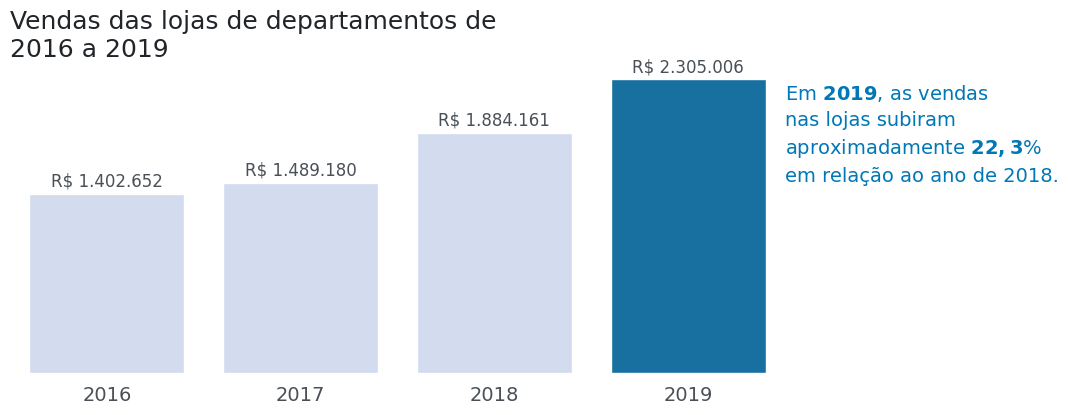

In [ ]:
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, 'vendas'] == df_vendas_ano['vendas'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

###**Pergunta 2** - Qual é o top7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?

In [ ]:
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto', 'lucro']]

top_lucro = top_lucro.groupby(['tipo_produto']).aggregate('sum').sort_values('lucro', ascending=False)

top_7 = top_lucro[:7]

top_7

In [ ]:
def grafico_top_7():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10, 4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style='white')

  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  ax = sns.barplot(data=top_7, x='lucro', y=top_7.index, palette = cores)

  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)

  for i, valor in enumerate(top_7['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e3
    ax.text(valor - offset, i, qtd, ha='right', fontsize=10, color=CINZA5, va = 'center', fontweight='bold')

  return ax

ax = grafico_top_7()

In [ ]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-11-322333da233d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_7, x='lucro', y=top_7.index, palette = cores)


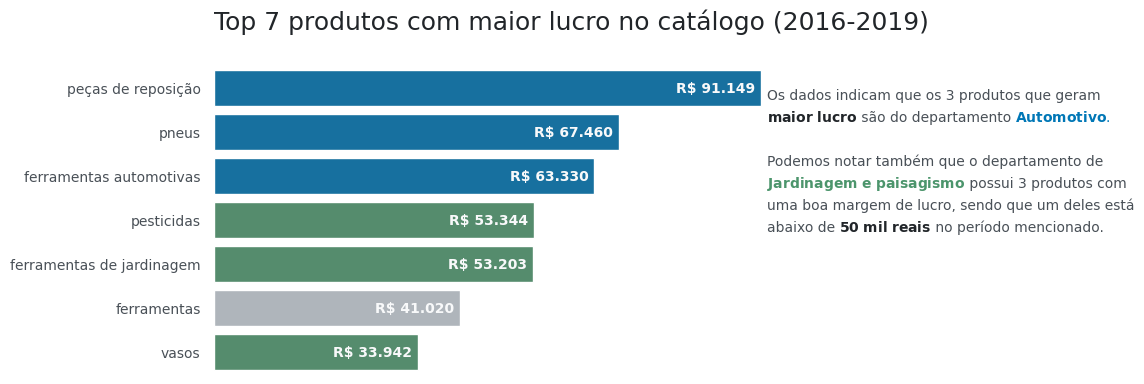

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

## Agrupando dados

###**Pergunta 3** - Se separarmos o total de vendas por ano por região? O que conseguimos observar em nossos dados?

In [ ]:
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['regiao', 'vendas', 'data_pedido']]

df_vendas_reg['ano'] = df_vendas_reg['data_pedido'].dt.year
df_vendas_reg.drop(labels='data_pedido', axis=1, inplace=True)

df_vendas_reg

In [ ]:
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao,
                         values = df_vendas_reg.vendas, aggfunc='sum')

vendas_reg = vendas_reg[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]
vendas_reg

In [ ]:
def grafico_vendas_regiao():
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  ax = vendas_reg.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)

  ax.set_title('Vendas das lojas de departamentos por região \nde 2016 a 2019', loc='left', fontsize=22, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation = 0)
  ax.set_frame_on(False)

  ax.tick_params(axis='both', which='both', length=0)

  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
          'das vendas nas lojas\n'
          'estão concentradas nas regiões\n'
          '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
          '$\\bf{Centro-Oeste}$ em 2019.',
          fontsize=14,
          linespacing=1.45,
          color=AZUL1)

  return ax

ax = grafico_vendas_regiao()

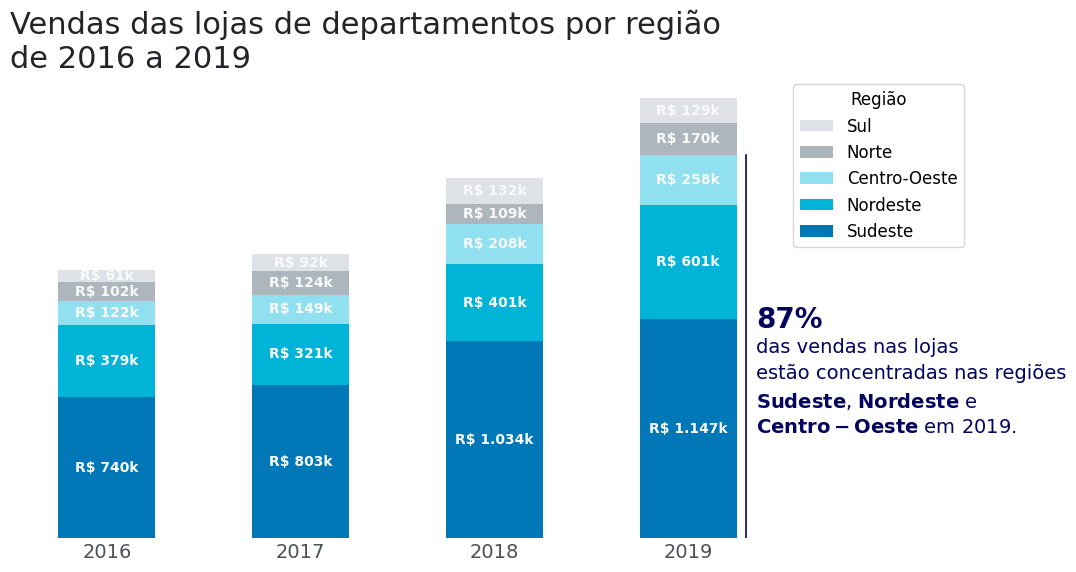

In [ ]:
ax = grafico_vendas_regiao()

ax.legend(bbox_to_anchor=(1, 1), reverse=True, title='Região', title_fontsize=12, fontsize=12)

for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f}k'.replace(',', '.') for valor in container]
  ax.bar_label(container, labels=labels, label_type='center', size=10, color=CINZA5, fontweight='bold')

ax.axvline(x=3.3, ymin=0, ymax=0.83, color=AZUL1, linewidth=1.2)

fig = ax.get_figure()

###**Pergunta 4** - Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?

In [ ]:
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

df_envio_seg = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente).sort_values('B2B')

df_envio_seg

In [ ]:
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente, normalize='index')
df_envio_normalizado

In [ ]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

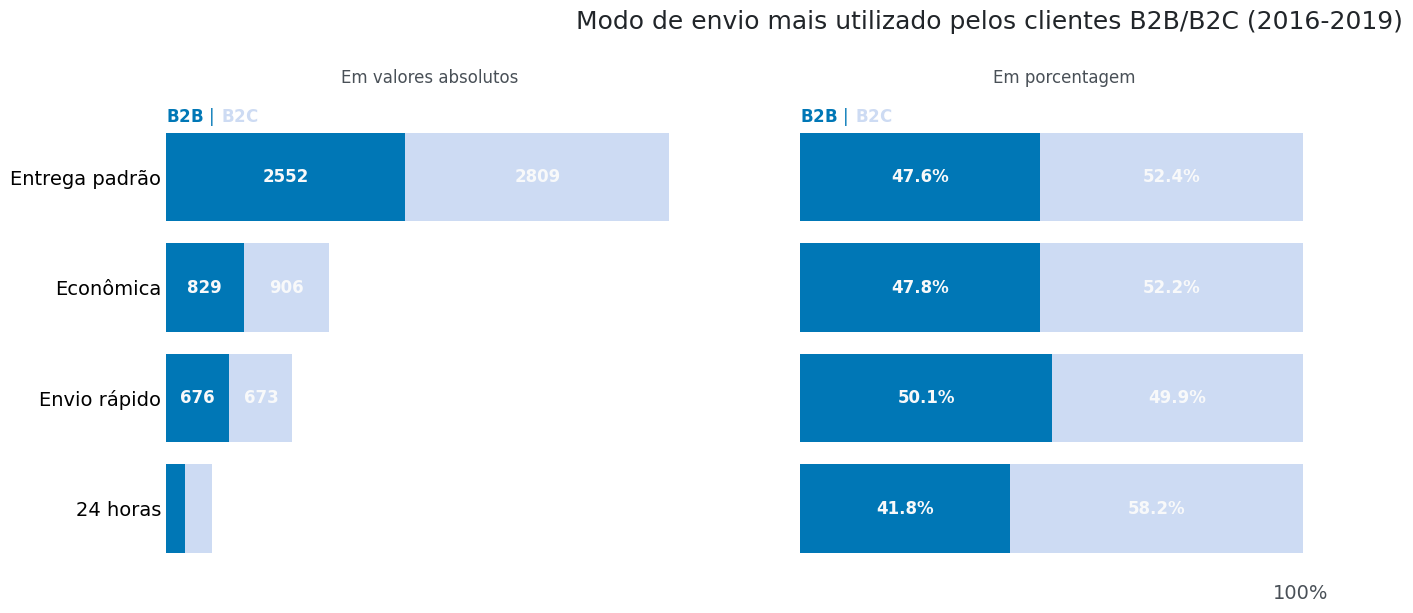

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15,6), sharey=True)

cores = [AZUL2, AZUL5]

# GRÁFICO 1 - Barras empilhadas

axs[0].barh(df_envio_seg.index, df_envio_seg["B2B"], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg["B2C"], left = df_envio_seg["B2B"], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

# GRÁFICO 2 - Barras empilhadas 100 %

axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()

## Séries de tempo

###**Pergunta 5** - Qual o total de vendas por trimestre do estado de São Paulo?

In [ ]:
df_sp = vendas.copy()
df_sp = df_sp.query('estado == "São Paulo"')[['data_pedido', 'vendas']]

df_sp.set_index('data_pedido', inplace=True)
df_sp = df_sp.resample('Q').agg('sum')

df_sp['vendas'] = round(df_sp['vendas'] / 1e3, 2)
df_sp = df_sp.reset_index()

df_sp

In [ ]:
def grafico_vendas_sp_tri():
  import matplotlib.pyplot as plt

  fig, ax = plt.subplots(figsize=(14,4))

  pontos_a_marcar = [True if mes == 12 else False for mes in df_sp['data_pedido'].dt.month]

  ax.plot(df_sp['data_pedido'], df_sp['vendas'], lw=3, color=AZUL5, marker='o',
          markersize=10, markerfacecolor=AZUL2, markevery=pontos_a_marcar)

  ax.set_title('Vendas por trimestre no estado de São Paulo', fontsize=18, color=CINZA1, loc='left')
  ax.text(0.3, 0.95, 'De 2016 a 2019 (em milhares de reais)', transform=ax.transAxes, color=CINZA2, fontsize=12, ha='right', va='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

  ax.tick_params(axis='both', which='both', length=0)

  plt.ylim(0,400)

  return ax

ax = grafico_vendas_sp_tri()

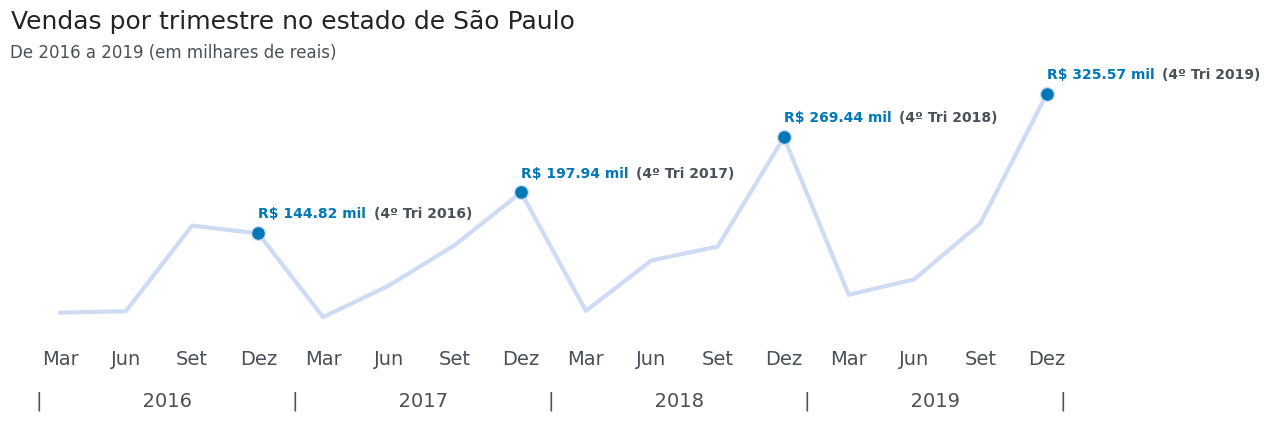

In [ ]:
import matplotlib.dates as mdates

ax = grafico_vendas_sp_tri()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ['Mar', 'Jun', 'Set', 'Dez'] * 4
ax.set_xticks(df_sp.data_pedido)
ax.set_xticklabels(x_labels, ha='center')

texto = [16*" " + str(i) + 16*" " for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color=CINZA2)

ano = 0
for i in range(3, len(df_sp["vendas"]), 4):
  ax.text(x = ax.get_xticks()[i], y = df_sp["vendas"][i] + 20, s = f"R$ {df_sp['vendas'][i]} mil", color = AZUL2, weight = "bold", fontsize = 10)
  ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20, s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
  ano +=1

fig = ax.get_figure()

###**Pergunta 6** - Qual o faturamento por trimestre em cada região?

In [ ]:
df_regiao = vendas.copy()
df_regiao = df_regiao[['regiao', 'data_pedido', 'vendas']]

df_regiao = pd.crosstab(index=df_regiao.data_pedido, columns=df_regiao.regiao, values=df_regiao.vendas, aggfunc='sum')

df_regiao = df_regiao[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]

df_regiao

In [ ]:
df_regiao = df_regiao.resample('Q').agg('sum')
df_regiao = round(df_regiao / 1e3, 2)
df_regiao

In [ ]:
import plotly.express as px

fig = px.line(df_regiao, x=df_regiao.index, y=df_regiao.columns, markers = True, labels={"regiao": "Região"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3])

fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Faturamento da loja de departamentos por trimestre' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

labels = ['T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
          'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
          'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
          'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019']
fig.update_xaxes(ticktext = labels, tickvals=df_regiao.index)

fig.show()

In [ ]:
# Dados ao passar o mouse
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}")
# fig.update_layout(hovermode="closest")    # para exibir apenas do dado que passamos o mouse
# fig.update_layout(hovermode="x")          # para exibir todos os dados do período em cada linha
# fig.update_layout(hovermode="x unified")  # para exibir o resumo de todos os dados no período

fig.show()

## Distribuindo dados

In [ ]:
import pandas as pd

In [ ]:
vol_amaciante = pd.read_csv("volume_amaciante.csv")
vol_amaciante.head()

In [ ]:
vol_amaciante.describe()

###**Pergunta 1** - Como estão distribuídos os dados dos volumes da amostra do amaciante? Qual seria seu valor central (média e mediana).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style='white')

#ax = sns.histplot(data = vol_amaciante, x = 'Volume', binwidth=0.1, color=AZUL2)
ax = sns.histplot(data = vol_amaciante, x = 'Volume', bins=20, color=AZUL2)

plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha='right', x=0.535, y=1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad=15, loc='left')
ax.set_xlabel('Volume (ml)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
sns.despine()

plt.show()

In [ ]:
def grafico_densidade():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(15,4))
  sns.set_theme(style='white')

  ax = sns.kdeplot(data = vol_amaciante, x = 'Volume', color=AZUL3, lw=0, fill=True)

  plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color=CINZA1, ha='right', x=0.635, y=1.05)
  plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad=15, loc='left')
  ax.set_xlabel('Volume (ml)', fontsize=14)
  ax.set_ylabel('Densidade', fontsize=14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
  ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
  sns.despine(left=True)

  return ax

ax = grafico_densidade()

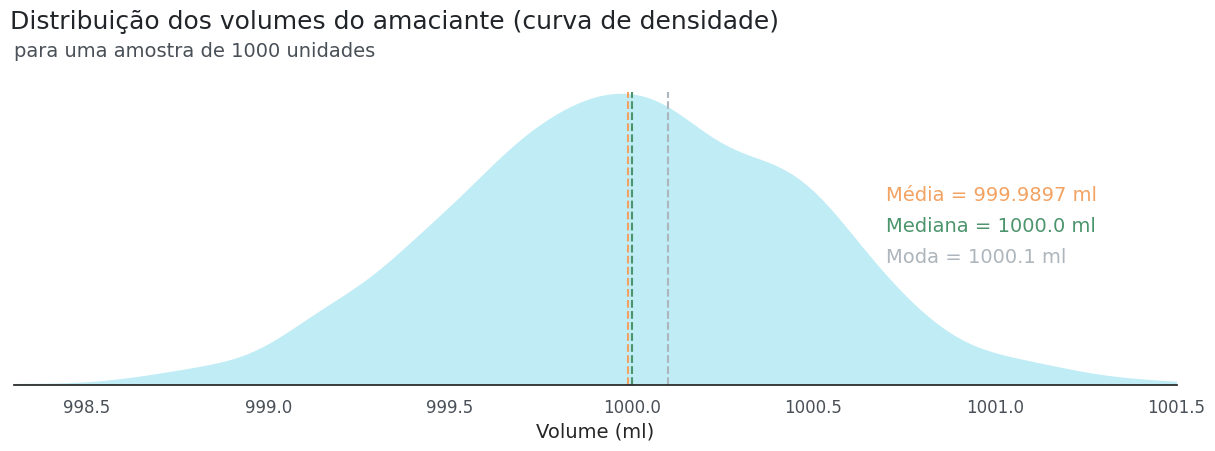

In [ ]:
ax = grafico_densidade()

ax.set_ylabel('')
ax.set_yticklabels([])

estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ['Média', 'Mediana', 'Moda']

cores = [LARANJA1, VERDE1, CINZA3]

ax.vlines(x=estat, ymin=0, ymax=0.8, colors=cores, linestyles='--')

# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color = cores[i], transform=ax.transAxes)

fig = ax.get_figure()

### **Pergunta 2** - Como estão distribuídos os dados dos volumes do amaciante de acordo com a mediana e os quartis? Possuo dados discrepantes?

/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


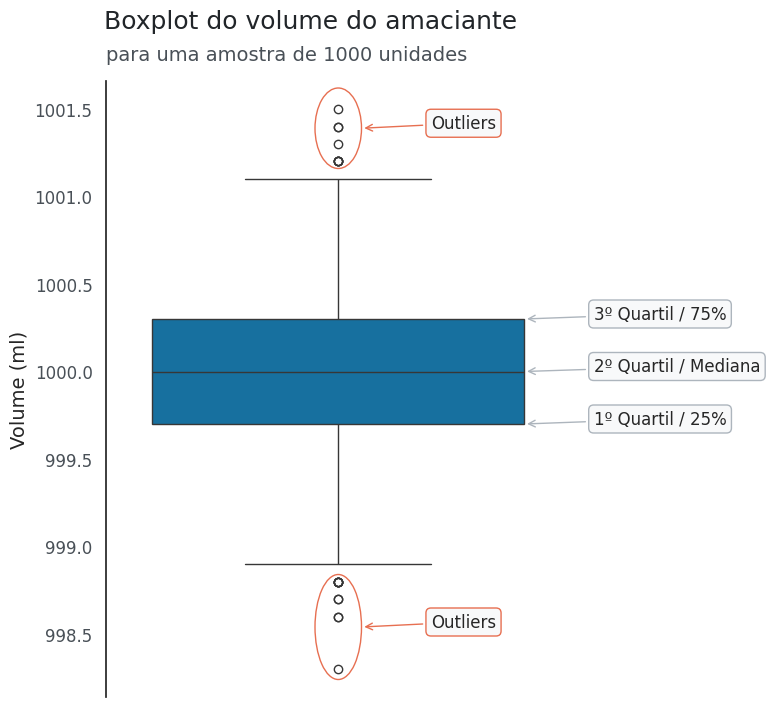

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style='white')

ax = sns.boxplot(data = vol_amaciante, y = 'Volume', orient='v', color=AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

plt.show()

## Explorando padrões nos dados

In [ ]:
import pandas as pd
df_medidas = pd.read_csv('medidas_sabao_em_po.csv')

df_medidas.sample(5)

In [ ]:
df_medidas.describe()

### **Pergunta 1** - Como está a distribuição das medidas de comprimento da embalagem de sabão em pó para cada uma das amostras?

In [ ]:
df_medidas.sample(5)

<ipython-input-9-bada0c61fe56>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data = df_medidas, x='amostra', y = 'comprimento', palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])


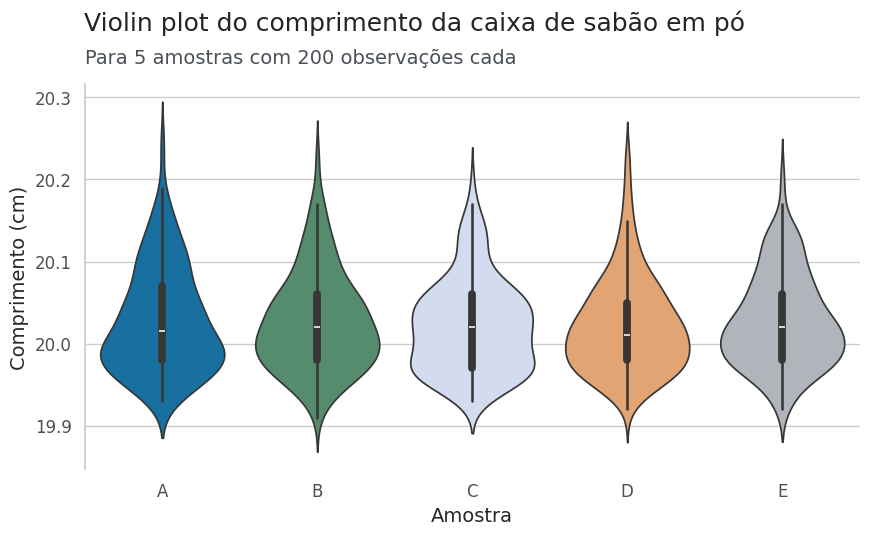

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')

ax = sns.violinplot(data = df_medidas, x='amostra', y = 'comprimento', palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.785, y = 1.03)
plt.title('Para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Amostra',  fontsize = 14)
ax.set_ylabel('Comprimento (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

plt.show()

###**Pergunta 2** - Como estão dispostas as medidas de comprimento e altura da amostra A? Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está 1% acima ou abaixo do valor de 20 e 15, respectivamente, quais seriam rejeitados?

In [ ]:
df_a = df_medidas.query('amostra == "A"')[['comprimento', 'altura']]
df_a.head()

In [ ]:
def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01):
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10,5))
  sns.set_theme(style='white')

  ax = sns.scatterplot(data = df_a, x = 'comprimento', y = 'altura', color = map_cores)

  plt.suptitle(f'Distribuição do comprimento x altura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
  plt.title(f'Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Comprimento (cm)', fontsize = 14)
  ax.set_ylabel('Altura (cm)', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  sns.despine()

  # Desenhando a linha horizontal com o límite mínimo de altura desejado
  ax.text(19.92, 14.855, 'Limite mínimo da altura', fontsize=12, color = CINZA2, va = "bottom")
  plt.axhline(y = 15 * (1 - pct), color = CINZA4, linestyle='--')

  # Desenhando a linha vertical com o límite máximo de comprimento desejado
  ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
  plt.axvline(x = 20 * (1 + pct), color = CINZA4, linestyle='--')

  return ax

ax = grafico_dispersao()

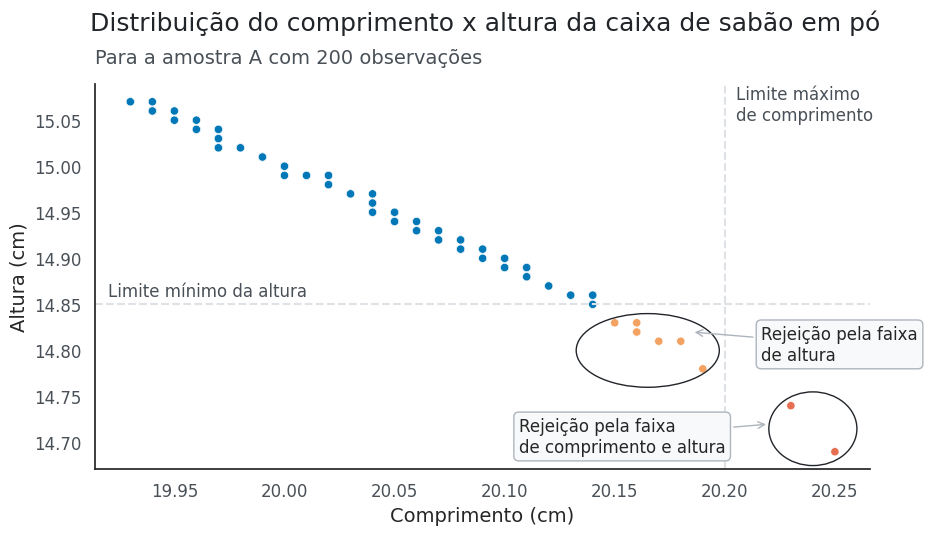

In [21]:
# Importando as bibliotecas
from matplotlib.patches import Ellipse
import numpy as np

# Definindo as cores do gráfico
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando o gráfico de dispersão e rejeitando os valores fora da faixa requisitada (1%)
pct = 0.01
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a["comprimento"]]
rejeita_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a["altura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))
ax = grafico_dispersao(map_cores, pct)

# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
             bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
             xytext=(-180, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()